## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [51]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [52]:
import requests

response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))


784594


In [53]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))
data[0:10]


9996


['n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
 'n00015388_238\thttp://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
 'n00015388_304\thttp://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
 'n00015388_327\thttp://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
 'n00015388_355\thttp://img100.imageshack.us/img100/3253/forrest004fs9.jpg',
 'n00015388_373\thttp://img172.imageshack.us/img172/4606/napo03072en9.jpg',
 'n00015388_379\thttp://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg',
 'n00015388_388\thttp://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg',
 'n00015388_442\thttp://www.porschemania.it/discus/messages/815/102099.jpg',
 'n00015388_474\thttp://farm1.static.flickr.com/72/225029238_805b0937ca.jpg']

## 將 txt 轉成 pandas dataframe

In [54]:
import pandas as pd
    
df = pd.DataFrame({'column1':data})
df.head()


column1
0  n00015388_157\thttp://farm1.static.flickr.com/...
1  n00015388_238\thttp://farm2.static.flickr.com/...
2  n00015388_304\thttp://farm1.static.flickr.com/...
3  n00015388_327\thttp://farm4.static.flickr.com/...
4  n00015388_355\thttp://img100.imageshack.us/img...

In [55]:
df=df['column1'].str.split('\t',expand=True)
df.head()

0                                                  1
0  n00015388_157  http://farm1.static.flickr.com/145/430300483_2...
1  n00015388_238  http://farm2.static.flickr.com/1005/3352960681...
2  n00015388_304  http://farm1.static.flickr.com/27/51009336_a96...
3  n00015388_327  http://farm4.static.flickr.com/3025/2444687979...
4  n00015388_355  http://img100.imageshack.us/img100/3253/forres...

## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [56]:
first_link =df.loc[:4,1]
print(first_link)

0    http://farm1.static.flickr.com/145/430300483_2...
1    http://farm2.static.flickr.com/1005/3352960681...
2    http://farm1.static.flickr.com/27/51009336_a96...
3    http://farm4.static.flickr.com/3025/2444687979...
4    http://img100.imageshack.us/img100/3253/forres...
Name: 1, dtype: object


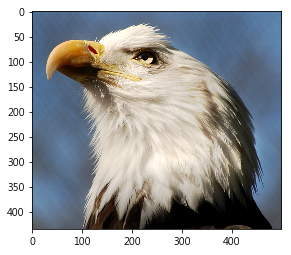

In [57]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0,1]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))


# Convert img to numpy array

plt.imshow(img)
plt.show()

In [58]:
import numpy as np

In [63]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    ima_list=np.array(url_list)
    return img_list

In [62]:
ima_list=np.array(df)
print(ima_list)

[['n00015388_157'
  'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg']
 ['n00015388_238'
  'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg']
 ['n00015388_304'
  'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg']
 ...
 ['n00433802_5208'
  'http://3.bp.blogspot.com/_9T2cRtlgHV0/SK55RHaybXI/AAAAAAAAAwY/VuzoyOGFARQ/s400/Eleni-Andriola-of-Greece4.jpg']
 ['n00433802_5211'
  'http://www.loudoungymnastics.com/images/Girls_doing_split%20jpg.jpg']
 ['' None]]


Total images that we got: 5 


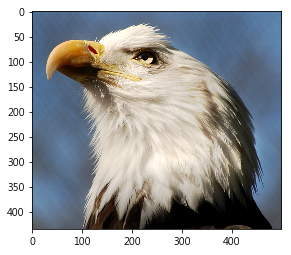

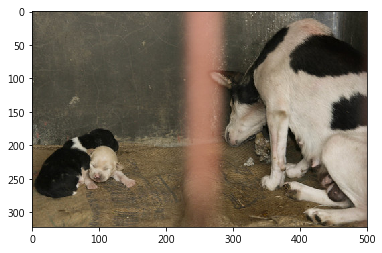

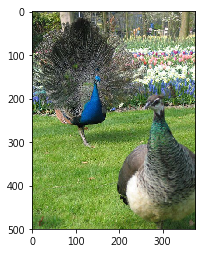

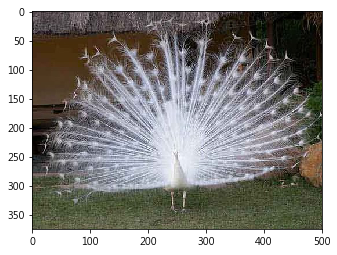

出圖錯誤


In [67]:
#result = img2arr_fromURLs(df[0:5][1].values)
result=df.loc[:4,1]

print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
#     print(im_get)
    try:
        response = requests.get(im_get)
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.show()

    except:
        print("出圖錯誤")
        
        

練習時間 Day_003-1
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家
Hints: 隨機產生數值

In [68]:
import pandas as pd
import numpy as np
data = {'國家': ['Nation_A', 'Nation_B', 'Nation_C', 'Nation_D', 'Nation_E'],
        '人口': np.random.randint(10000000,size=5)}
data = pd.DataFrame(data)
data.set_index('國家', inplace=True)
print(data)

               人口
國家               
Nation_A  2069694
Nation_B  8280470
Nation_C  3325369
Nation_D  5805424
Nation_E  8170010


In [70]:
print(data['人口'].idxmax())

Nation_B
